## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [0.25, 0.5, 0.75]
redice_lr_patient = [5, 10, 15]

In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=reduce_factor, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.25, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 2s 38us/step - loss: 1.2619 - acc: 0.5625 - val_loss: 1.4694 - val_acc: 0.4837
Epoch 14/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2390 - acc: 0.5708 - val_loss: 1.4669 - val_acc: 0.4864
Epoch 15/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2186 - acc: 0.5779 - val_loss: 1.4673 - val_acc: 0.4890
Epoch 16/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1982 - acc: 0.5844 - val_loss: 1.4689 - val_acc: 0.4903
Epoch 17/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1787 - acc: 0.5923 - val_loss: 1.4598 - val_acc: 0.4952
Epoch 18/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1605 - acc: 0.5986 - val_loss: 1.4453 - val_acc: 0.4954
Epoch 19/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1406 - acc: 0.6061 - val_loss: 1.4474 - val_acc: 0.4946
Epoch 20/25
50000/50000 [=====================

50000/50000 [==============================] - 3s 53us/step - loss: 2.2209 - acc: 0.2651 - val_loss: 2.1623 - val_acc: 0.2969
Epoch 2/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7624 - acc: 0.3849 - val_loss: 1.8073 - val_acc: 0.3796
Epoch 3/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.6332 - acc: 0.4252 - val_loss: 1.6940 - val_acc: 0.4156
Epoch 4/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5604 - acc: 0.4510 - val_loss: 1.6308 - val_acc: 0.4284
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5051 - acc: 0.4718 - val_loss: 1.5881 - val_acc: 0.4416
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4608 - acc: 0.4886 - val_loss: 1.5591 - val_acc: 0.4507
Epoch 7/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4254 - acc: 0.5000 - val_loss: 1.5322 - val_acc: 0.4652
Epoch 8/25
50000/50000 [============================

50000/50000 [==============================] - 2s 38us/step - loss: 1.0648 - acc: 0.6346 - val_loss: 1.4506 - val_acc: 0.4943
Epoch 25/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.0486 - acc: 0.6425 - val_loss: 1.4559 - val_acc: 0.4911
Numbers of exp: 5, reduce_factor: 0.50, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_16 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2884 - acc: 0.5502 - val_loss: 1.4813 - val_acc: 0.4829
Epoch 13/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2666 - acc: 0.5585 - val_loss: 1.4738 - val_acc: 0.4781
Epoch 14/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2459 - acc: 0.5667 - val_loss: 1.4827 - val_acc: 0.4817
Epoch 15/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2248 - acc: 0.5740 - val_loss: 1.4675 - val_acc: 0.4815
Epoch 16/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.2043 - acc: 0.5844 - val_loss: 1.4528 - val_acc: 0.4897
Epoch 17/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1851 - acc: 0.5891 - val_loss: 1.4587 - val_acc: 0.4924
Epoch 18/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1664 - acc: 0.5959 - val_loss: 1.4504 - val_acc: 0.4935
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 60us/step - loss: 2.2434 - acc: 0.2658 - val_loss: 2.3191 - val_acc: 0.2907
Epoch 2/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7638 - acc: 0.3875 - val_loss: 1.8411 - val_acc: 0.3745
Epoch 3/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.6358 - acc: 0.4301 - val_loss: 1.6865 - val_acc: 0.4170
Epoch 4/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5633 - acc: 0.4541 - val_loss: 1.6246 - val_acc: 0.4334
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5091 - acc: 0.4744 - val_loss: 1.5983 - val_acc: 0.4433
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4634 - acc: 0.4891 - val_loss: 1.5687 - val_acc: 0.4485
Epoch 7/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4265 - acc: 0.5020 - val_loss: 1.5546 - val_acc

50000/50000 [==============================] - 2s 41us/step - loss: 0.6176 - acc: 0.8053 - val_loss: 1.3561 - val_acc: 0.5443
Epoch 23/25
50000/50000 [==============================] - 2s 42us/step - loss: 0.6149 - acc: 0.8069 - val_loss: 1.3571 - val_acc: 0.5419
Epoch 24/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.6129 - acc: 0.8082 - val_loss: 1.3616 - val_acc: 0.5413
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.6114 - acc: 0.8088 - val_loss: 1.3651 - val_acc: 0.5432
Numbers of exp: 10, reduce_factor: 0.25, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batc

Epoch 10/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4348 - acc: 0.4991 - val_loss: 1.5777 - val_acc: 0.4445
Epoch 11/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.4179 - acc: 0.5053 - val_loss: 1.5646 - val_acc: 0.4475
Epoch 12/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4011 - acc: 0.5104 - val_loss: 1.5621 - val_acc: 0.4502
Epoch 13/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.3866 - acc: 0.5150 - val_loss: 1.5498 - val_acc: 0.4506
Epoch 14/25
50000/50000 [==============================] - 2s 44us/step - loss: 1.3719 - acc: 0.5223 - val_loss: 1.5428 - val_acc: 0.4546
Epoch 15/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3596 - acc: 0.5245 - val_loss: 1.5370 - val_acc: 0.4566
Epoch 16/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3461 - acc: 0.5304 - val_loss: 1.5282 - val_acc: 0.4612
Epoch 17/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 73us/step - loss: 2.1519 - acc: 0.2825 - val_loss: 2.0327 - val_acc: 0.3225
Epoch 2/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.7713 - acc: 0.3832 - val_loss: 1.8084 - val_acc: 0.3743
Epoch 3/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.6692 - acc: 0.4167 - val_loss: 1.7419 - val_acc: 0.3904
Epoch 4/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.6069 - acc: 0.4380 - val_loss: 1.7145 - val_acc: 0.4010
Epoch 5/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5635 - acc: 0.4535 - val_loss: 1.6613 - val_acc: 0.4143
Epoch 6/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5291 - acc: 0.4651 - val_loss: 1.6376 - val_acc: 0.4224
Epoch 7/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4992 - acc: 0.4750 - val_loss: 1.6394 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.2616 - acc: 0.5648 - val_loss: 1.4944 - val_acc: 0.4675
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2518 - acc: 0.5682 - val_loss: 1.4944 - val_acc: 0.4734
Numbers of exp: 15, reduce_factor: 0.75, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_46 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizati

Epoch 12/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3893 - acc: 0.5147 - val_loss: 1.5545 - val_acc: 0.4553
Epoch 13/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3744 - acc: 0.5199 - val_loss: 1.5385 - val_acc: 0.4608
Epoch 14/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3598 - acc: 0.5253 - val_loss: 1.5379 - val_acc: 0.4601
Epoch 15/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3458 - acc: 0.5318 - val_loss: 1.5316 - val_acc: 0.4623
Epoch 16/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3328 - acc: 0.5367 - val_loss: 1.5299 - val_acc: 0.4631
Epoch 17/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3212 - acc: 0.5404 - val_loss: 1.5263 - val_acc: 0.4603
Epoch 18/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3098 - acc: 0.5447 - val_loss: 1.5208 - val_acc: 0.4672
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 79us/step - loss: 1.8480 - acc: 0.3623 - val_loss: 2.1547 - val_acc: 0.3110
Epoch 2/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.5422 - acc: 0.4542 - val_loss: 2.4716 - val_acc: 0.2761
Epoch 3/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4236 - acc: 0.4962 - val_loss: 1.9348 - val_acc: 0.3470
Epoch 4/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.3409 - acc: 0.5227 - val_loss: 1.8338 - val_acc: 0.4001
Epoch 5/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2799 - acc: 0.5496 - val_loss: 1.9269 - val_acc: 0.3586
Epoch 6/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2231 - acc: 0.5695 - val_loss: 1.8132 - val_acc: 0.3756
Epoch 7/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1700 - acc: 0.5859 - val_loss: 2.4554 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 0.6472 - acc: 0.7988 - val_loss: 1.4207 - val_acc: 0.5276
Epoch 24/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.6260 - acc: 0.8072 - val_loss: 1.4138 - val_acc: 0.5308
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 0.6150 - acc: 0.8130 - val_loss: 1.4250 - val_acc: 0.5249
Numbers of exp: 20, reduce_factor: 0.25, reduce_patient: 15
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_61 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_lay

Epoch 11/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2823 - acc: 0.5551 - val_loss: 1.4958 - val_acc: 0.4768
Epoch 12/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2554 - acc: 0.5647 - val_loss: 1.5043 - val_acc: 0.4739
Epoch 13/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2294 - acc: 0.5735 - val_loss: 1.5105 - val_acc: 0.4766
Epoch 14/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2068 - acc: 0.5833 - val_loss: 1.5129 - val_acc: 0.4636
Epoch 15/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1851 - acc: 0.5900 - val_loss: 1.5015 - val_acc: 0.4764
Epoch 16/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1631 - acc: 0.6000 - val_loss: 1.4668 - val_acc: 0.4884
Epoch 17/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1410 - acc: 0.6105 - val_loss: 1.4699 - val_acc: 0.4854
Epoch 18/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 86us/step - loss: 2.0944 - acc: 0.2966 - val_loss: 2.0676 - val_acc: 0.3141
Epoch 2/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.7545 - acc: 0.3902 - val_loss: 1.8488 - val_acc: 0.3695
Epoch 3/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.6301 - acc: 0.4328 - val_loss: 1.7775 - val_acc: 0.3894
Epoch 4/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.5496 - acc: 0.4598 - val_loss: 1.6778 - val_acc: 0.4223
Epoch 5/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.4884 - acc: 0.4794 - val_loss: 1.6315 - val_acc: 0.4278
Epoch 6/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.4385 - acc: 0.4978 - val_loss: 1.5945 - val_acc: 0.4452
Epoch 7/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.3985 - acc: 0.5125 - val_loss: 1.5913 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.0173 - acc: 0.6566 - val_loss: 1.4736 - val_acc: 0.4909
Epoch 25/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.0014 - acc: 0.6624 - val_loss: 1.5044 - val_acc: 0.4866
Numbers of exp: 25, reduce_factor: 0.75, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_76 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizat

Epoch 12/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2538 - acc: 0.5641 - val_loss: 1.5346 - val_acc: 0.4644
Epoch 13/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2274 - acc: 0.5742 - val_loss: 1.5341 - val_acc: 0.4633
Epoch 14/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2046 - acc: 0.5821 - val_loss: 1.5305 - val_acc: 0.4715
Epoch 15/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1811 - acc: 0.5912 - val_loss: 1.4917 - val_acc: 0.4795
Epoch 16/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.1591 - acc: 0.6015 - val_loss: 1.5038 - val_acc: 0.4781
Epoch 17/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1392 - acc: 0.6091 - val_loss: 1.4710 - val_acc: 0.4892
Epoch 18/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1184 - acc: 0.6160 - val_loss: 1.4826 - val_acc: 0.4850
Epoch 19/25
50000/50000 [=========

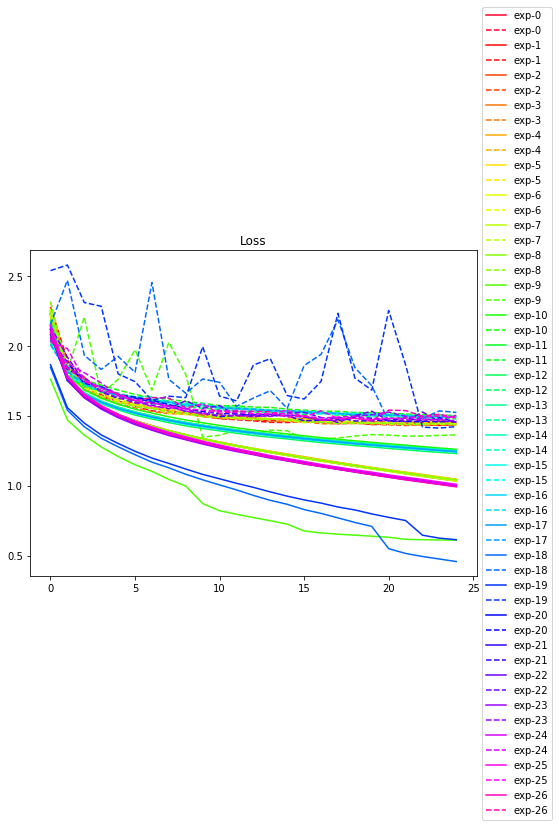

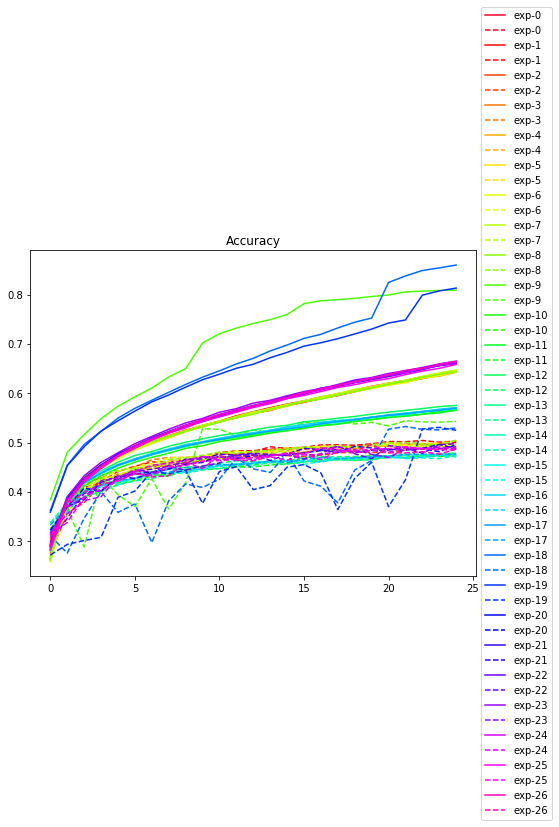

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()